In [1]:
# UFRJ/COPPE/PEE - Processamento de Sinais Aleatórios - 2019.3
# Professor: Luiz Wagner Pereira Biscainho
# Exercicio C1 - Processo Aleatório Autoregressivo
# Aluna: Maria Gabriella Andrade Felgas

import numpy as np
import matplotlib.pyplot as plt

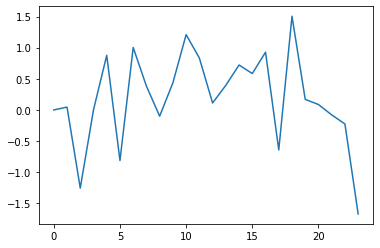

In [2]:
# Definindo os parâmetros
a = np.asarray([1, 0, 0.81])
b = 1

# Definindo o numero de amostras a serem geradas
num_amostras = 24

# Considerando que o sinal é causal
# Ou seja, inicializando as amostras anteriores
# com zero
x1 = 0
x2 = 0

# Inicializando o vetor de amostras
x = np.zeros((num_amostras))

# Inicializando o ruído branco
mean = 0
std = 1 
num_samples = 24
samples = np.random.normal(mean, std, size=num_samples)
plt.plot(samples)
plt.show()

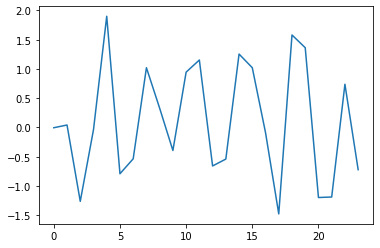

In [3]:
# Gerando as amostras do sinal

for i in range(num_amostras):    
    x[i] = - (a[1] * x1) - (a[2] * x2) + (b * samples[i])
    x2 = x1
    x1 = x[i]
    
plt.plot(x)
plt.show()

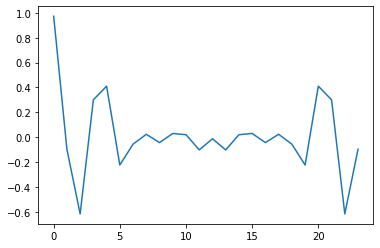

In [4]:
# Para o cálculo de autocorrelação amostral
# é preciso calcular a correlação de cada ponto
# com todos os outros considerando diferentes intervalos

r_hat = np.zeros((num_amostras))

for k in range(num_amostras):
    for n in range(num_amostras):
        # segundo a definição do livro (ex. C3.2)
        r_hat[k] += (x[n] * np.conj(x[n - k]))

    r_hat[k] /= num_amostras

plt.plot(r_hat)
plt.show()

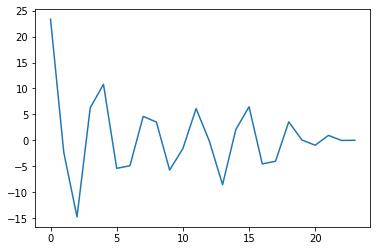

In [5]:
# Para calcular o valor verdadeiro da correlação
# é necessário considerar a correlação a partir
# da função do processo AR

r = np.correlate(x, x, mode='full')
r = r[r.size // 2:]

plt.plot(r)
plt.show()

In [6]:
# # Para calcular o valor verdadeiro da correlação
# # é necessário considerar a correlação a partir
# # da função do processo AR

# corr = np.zeros((num_amostras))

# for k in range(num_amostras):
#     for n in range(num_amostras):
#         corr[k] = ((a1 ** 2) * (x[n - 1] * x[n - 1 + k]))\
#                 + ((a1 * a2) * ((x[n - 1] * x[n - 2 + k]) + (x[n - 2] * x[n - 1 + k])))\
#                 + ((a2 ** 2) * (x[n - 2] * x[n - 2 + k]))
        
#     if k == 0:
#         corr[k] += b * (std ** 2)
                
# plt.plot(corr)
# plt.show()

(24,)
(24,)


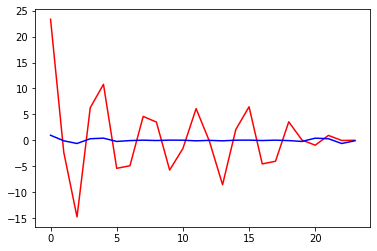

In [7]:
# Comparando r com r_hat

print(r.shape)
print(r_hat.shape)

plt.plot(r, 'r') 
plt.plot(r_hat, 'b')
plt.show()

C:\Users\gabri\Anaconda3\envs\cpe764\lib\site-packages\numpy\core\numeric.py:538: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


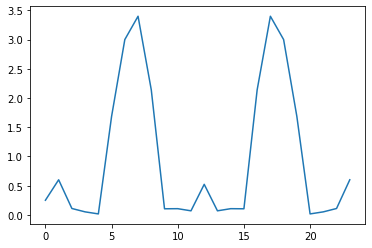

In [8]:
P_jw = np.fft.fft(r_hat, num_amostras)

plt.plot(P_jw)
plt.show()

In [16]:
# Considerando as equações Yule-Walker
# é possível estimar os valores de a(1),
# a(2) e b(0) a partir de r_hat

delta = np.zeros((a.shape))
delta[0] = 1

R_hat = [[r_hat[0], r_hat[-1], r_hat[-2]], [r_hat[1], r_hat[0], r_hat[-1]],[r_hat[2], r_hat[1], r_hat[0]]]

a_hat = np.dot(np.linalg.inv(R_hat), ((std ** 2) * (b ** 2) * delta)) 
print(a_hat)

[1.8006429  0.29591665 1.17181546]
